<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Neon Live\AppData\Local\Temp\ipykernel_1128\1677003276.py:5: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('archives\dados_bacen.csv', index_col=0, parse_dates=True)


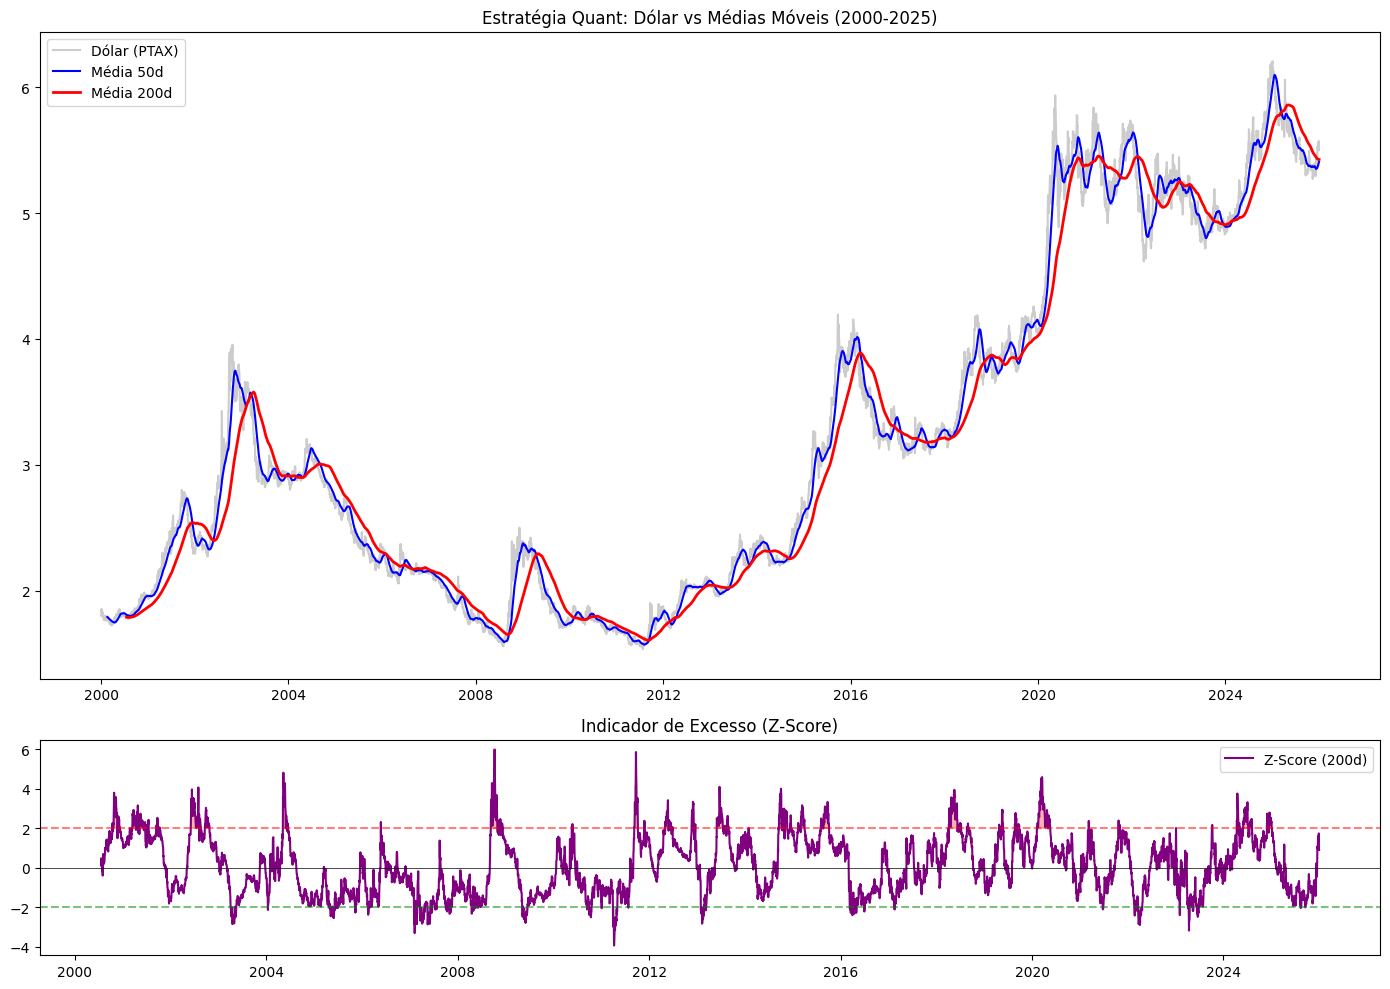

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar os dados (Ajuste o nome do arquivo se necessário)
df = pd.read_csv('archives\dados_bacen.csv', index_col=0, parse_dates=True)

# 2. Criar as Médias Móveis para o Dólar
# A MA50 segue a tendência de curto/médio prazo
df['MA50'] = df['Dólar (PTAX)'].rolling(window=50).mean()

# A MA200 é a "linha na areia" para a tendência de longo prazo
df['MA200'] = df['Dólar (PTAX)'].rolling(window=200).mean()

# 3. Calcular o Z-Score (Distância da Média de 200 dias)
# Isso mede quantos desvios padrões o preço atual está longe da média
df['STD200'] = df['Dólar (PTAX)'].rolling(window=200).std()
df['Z-Score'] = (df['Dólar (PTAX)'] - df['MA200']) / df['STD200']

# 4. Plotar o resultado
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1]})

# Gráfico de Preços e Médias
ax1.plot(df.index, df['Dólar (PTAX)'], label='Dólar (PTAX)', color='gray', alpha=0.4)
ax1.plot(df.index, df['MA50'], label='Média 50d', color='blue', linewidth=1.5)
ax1.plot(df.index, df['MA200'], label='Média 200d', color='red', linewidth=2)
ax1.set_title('Estratégia Quant: Dólar vs Médias Móveis (2000-2025)')
ax1.legend()

# Gráfico de Z-Score (O oscilador)
ax2.plot(df.index, df['Z-Score'], color='purple', label='Z-Score (200d)')
ax2.axhline(2, color='red', linestyle='--', alpha=0.5)  # Acima de 2 = Muito Caro
ax2.axhline(-2, color='green', linestyle='--', alpha=0.5) # Abaixo de -2 = Muito Barato
ax2.axhline(0, color='black', linewidth=0.5)
ax2.fill_between(df.index, 2, df['Z-Score'], where=(df['Z-Score'] >= 2), color='red', alpha=0.3)
ax2.fill_between(df.index, -2, df['Z-Score'], where=(df['Z-Score'] <= -2), color='green', alpha=0.3)
ax2.set_title('Indicador de Excesso (Z-Score)')
ax2.legend()

plt.tight_layout()
plt.show()

# Salvar o novo dataset com as métricas para usar no seu modelo de ML
df.to_csv('dados_com_indicadores.csv')

In [2]:
# Criando a variável alvo para ML (1 se o dólar subiu em 30 dias, 0 se caiu)
df['Target'] = (df['Dólar (PTAX)'].shift(-30) > df['Dólar (PTAX)']).astype(int)

# Agora você pode treinar um modelo para prever a probabilidade de alta

In [6]:
df

,Dólar (PTAX),Selic Diária (%),Selic Anual (%),IPCA Anual (%),Fed Rate (%),MA50,MA200,STD200,Z-Score,Target
2000-01-01,1.8003,0.069186,0.190399,0.0885,0.0545,NaN,NaN,NaN,NaN,1
2000-01-02,1.8003,0.069186,0.190399,0.0885,0.0545,NaN,NaN,NaN,NaN,0
2000-01-03,1.8003,0.069186,0.190399,0.0885,0.0545,NaN,NaN,NaN,NaN,0
2000-01-04,1.8329,0.069186,0.190399,0.0885,0.0545,NaN,NaN,NaN,NaN,0
2000-01-05,1.8536,0.069220,0.190501,0.0885,0.0545,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
2025-12-27,5.5407,0.055131,0.149000,0.0446,0.0372,5.393926,5.427801,0.083286,1.355550,0
2025-12-28,5.5407,0.055131,0.149000,0.0446,0.0372,5.397618,5.427813,0.083302,1.355160,0
2025-12-29,5.5733,0.055131,0.149000,0.0446,0.0372,5.401962,5.427989,0.083572,1.738761,0
2025-12-30,5.5018,0.055131,0.149000,0.0446,0.0372,5.405648,5.427674,0.083173,0.891220,0


In [7]:
print(df[['Dólar (PTAX)', 'Selic Anual (%)', 'IPCA Anual (%)', 'Fed Rate (%)']].corr())

                 Dólar (PTAX)  Selic Anual (%)  IPCA Anual (%)  Fed Rate (%)
Dólar (PTAX)         1.000000        -0.261118        0.001717      0.101999
Selic Anual (%)     -0.261118         1.000000        0.582987      0.349046
IPCA Anual (%)       0.001717         0.582987        1.000000     -0.255243
Fed Rate (%)         0.101999         0.349046       -0.255243      1.000000


In [8]:
df['Spread_Selic_Fed'] = df['Selic Anual (%)'] - df['Fed Rate (%)']

In [9]:
print(df[['Dólar (PTAX)', 'Spread_Selic_Fed']].corr())

                  Dólar (PTAX)  Spread_Selic_Fed
Dólar (PTAX)          1.000000         -0.322898
Spread_Selic_Fed     -0.322898          1.000000


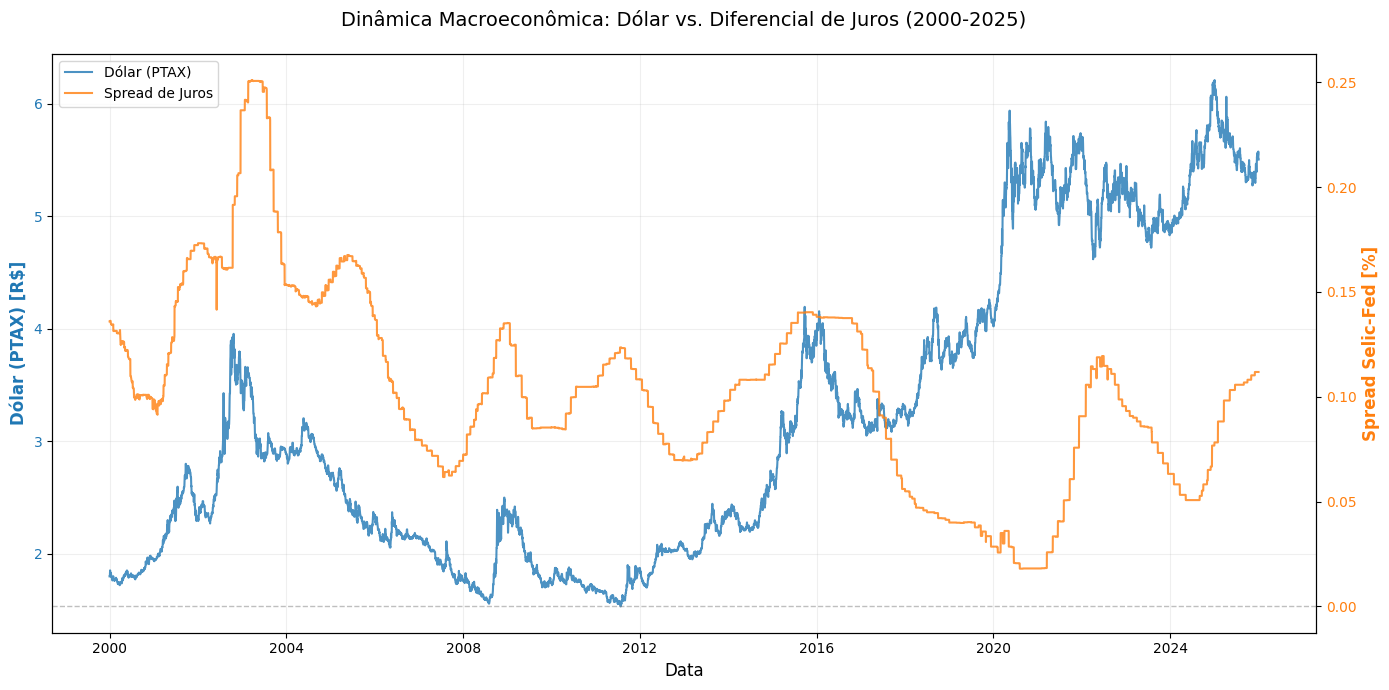

In [51]:
import matplotlib.pyplot as plt

# Criando a figura e o primeiro eixo (ax1)
fig, ax1 = plt.subplots(figsize=(14, 7))

# Configuração do Eixo 1: Dólar (PTAX) - Escala em Reais (R$)
color_dolar = 'tab:blue'
ax1.set_xlabel('Data', fontsize=12)
ax1.set_ylabel('Dólar (PTAX) [R$]', color=color_dolar, fontsize=12, fontweight='bold')
ax1.plot(df.index, df['Dólar (PTAX)'], color=color_dolar, label='Dólar (PTAX)', linewidth=1.5, alpha=0.8)
ax1.tick_params(axis='y', labelcolor=color_dolar)
ax1.grid(True, alpha=0.2)

# Criando o segundo eixo (ax2) compartilhando o eixo X
ax2 = ax1.twinx()

# Configuração do Eixo 2: Spread de Juros (Selic - Fed) - Escala em %
color_spread = 'tab:orange'
ax2.set_ylabel('Spread Selic-Fed [%]', color=color_spread, fontsize=12, fontweight='bold')
ax2.plot(df.index, df['Spread_Selic_Fed'], color=color_spread, label='Spread de Juros', linewidth=1.5, alpha=0.8)
ax2.tick_params(axis='y', labelcolor=color_spread)

# Adicionando uma linha horizontal no zero do spread (ponto de paridade teórica)
ax2.axhline(0, color='gray', linestyle='--', linewidth=1, alpha=0.5)

# Título e ajustes finais
plt.title('Dinâmica Macroeconômica: Dólar vs. Diferencial de Juros (2000-2025)', fontsize=14, pad=20)

# Unindo as legendas de ambos os eixos
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

In [14]:
import pandas as pd

# Carregando o arquivo (ajuste o nome para o arquivo que você baixou)
df_cds = pd.read_csv('archives/brazil_cds_5y.csv')

# 1. Limpeza: Converter data para o padrão do Pandas
# O formato "02.01.2026" precisa ser transformado em datetime
df_cds['Data'] = pd.to_datetime(df_cds['Data'], format='%d.%m.%Y')

# 2. Limpeza: Converter o número (de string com vírgula para float)
# Se o seu CSV veio com vírgula, o Pandas lê como texto
if df_cds['Último'].dtype == 'O': # Se for objeto/string
    df_cds['Último'] = df_cds['Último'].str.replace(',', '.').astype(float)

# 3. Preparar para o Merge
df_cds = df_cds[['Data', 'Último']]
df_cds.columns = ['Data', 'CDS_Brasil']
df_cds.set_index('Data', inplace=True)

# 4. Ordenar as datas (importante para o ffill funcionar)
df_cds = df_cds.sort_index()

print(df_cds.head())

            CDS_Brasil
Data                  
2007-12-19       107.3
2007-12-20       107.3
2007-12-21       107.3
2007-12-24       107.3
2007-12-25       107.3


In [27]:
# Unindo ao seu DataFrame principal (df_final)
# Usamos how='left' para manter o calendário completo que você já tem
df_completo = df.join(df_cds, how='left')

# Preencher os dias sem negociação de CDS (finais de semana)
df_completo['CDS_Brasil'] = df_completo['CDS_Brasil'].ffill()

# Agora, a prova real:
correlacao_recente = df_completo.loc['2008':, ['Dólar (PTAX)', 'CDS_Brasil', 'Spread_Selic_Fed']].corr()
print("Matriz de Correlação Pós-2016:\n", correlacao_recente)

Matriz de Correlação Pós-2016:
                   Dólar (PTAX)  CDS_Brasil  Spread_Selic_Fed
Dólar (PTAX)          1.000000    0.244244         -0.394283
CDS_Brasil            0.244244    1.000000          0.378844
Spread_Selic_Fed     -0.394283    0.378844          1.000000


In [37]:
df_corte = df_completo.loc['2008':, ['Dólar (PTAX)', 'CDS_Brasil', 'Spread_Selic_Fed']]

In [38]:
df_corte.size

19725

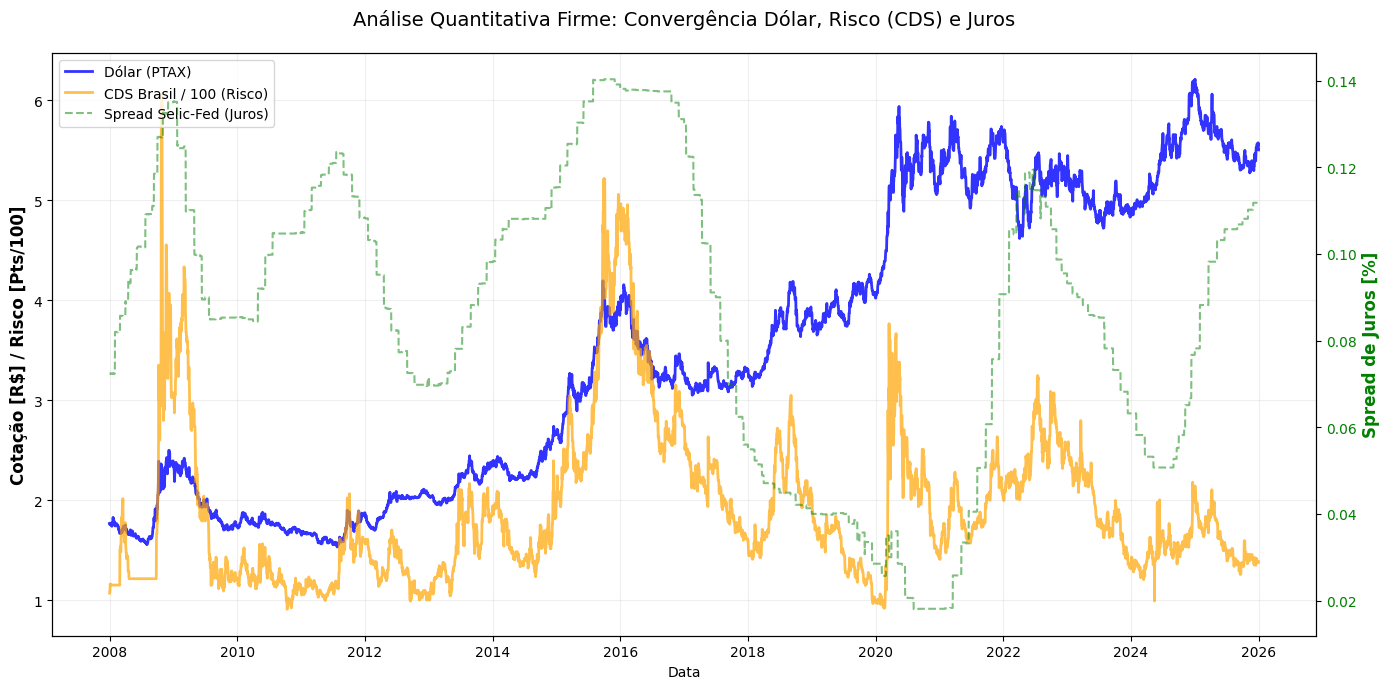

In [52]:
import matplotlib.pyplot as plt

# 1. Preparar a figura e o eixo principal
fig, ax1 = plt.subplots(figsize=(14, 7))

# --- EIXO 1: Dólar e CDS Escalonado (Escala comparativa) ---
ax1.plot(df_corte.index, df_corte['Dólar (PTAX)'], 
         label='Dólar (PTAX)', color='blue', alpha=0.8, linewidth=2)

# Dividindo o CDS por 100 para alinhar à escala do PTAX
ax1.plot(df_corte.index, df_corte['CDS_Brasil'] / 100, 
         label='CDS Brasil / 100 (Risco)', color='orange', alpha=0.7, linewidth=2)

ax1.set_xlabel('Data')
ax1.set_ylabel('Cotação [R$] / Risco [Pts/100]', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.2)

# --- EIXO 2: Spread de Juros (Escala de Porcentagem) ---
ax2 = ax1.twinx()
ax2.plot(df_corte.index, df_corte['Spread_Selic_Fed'], 
         label='Spread Selic-Fed (Juros)', color='green', alpha=0.5, linestyle='--')

ax2.set_ylabel('Spread de Juros [%]', color='green', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='green')

# 2. Título e Legenda Unificada
plt.title('Análise Quantitativa Firme: Convergência Dólar, Risco (CDS) e Juros', fontsize=14, pad=20)

# Unindo as legendas de eixos diferentes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

In [41]:
print(df_corte[['CDS_Brasil', 'Dólar (PTAX)']].corr())

              CDS_Brasil  Dólar (PTAX)
CDS_Brasil      1.000000      0.244244
Dólar (PTAX)    0.244244      1.000000


In [42]:
import pandas as pd

# 1. Calcular a variação diária percentual do CDS
df_corte['Retorno_CDS'] = df_corte['CDS_Brasil'].pct_change()

# 2. Calcular a Média e o Desvio Padrão dessa variação (janela móvel ou histórica)
# Vamos usar a histórica para pegar os grandes sustos de 2008-2025
media_retorno = df_corte['Retorno_CDS'].mean()
std_retorno = df_corte['Retorno_CDS'].std()

# 3. Criar um filtro para dias onde a subida foi maior que 2 Desvios Padrões
# Isso isola os "Cisnes Negros" ou dias de grande tensão fiscal
filtro_estresse = df_corte['Retorno_CDS'] > (media_retorno + 2 * std_retorno)

# 4. Criar um DataFrame apenas com esses dias de crise
df_crise = df_corte[filtro_estresse]

# 5. Calcular a correlação nesses dias específicos
corr_crise = df_crise['Dólar (PTAX)'].corr(df_crise['CDS_Brasil'])

print(f"Número de dias de estresse identificados: {len(df_crise)}")
print(f"Correlação Dólar vs CDS apenas em dias de crise: {corr_crise:.4f}")

Número de dias de estresse identificados: 141
Correlação Dólar vs CDS apenas em dias de crise: 0.1316


In [43]:
# Testando a correlação com 1 dia de atraso (Lag 1)
# Estamos comparando o Dólar de hoje com o CDS de ontem
corr_lag1 = df_crise['Dólar (PTAX)'].corr(df_crise['CDS_Brasil'].shift(1))
corr_lag2 = df_crise['Dólar (PTAX)'].corr(df_crise['CDS_Brasil'].shift(2))

print(f"Correlação em dias de crise (Sem Lag): {corr_crise:.4f}")
print(f"Correlação em dias de crise (Lag 1 dia): {corr_lag1:.4f}")
print(f"Correlação em dias de crise (Lag 2 dias): {corr_lag2:.4f}")

Correlação em dias de crise (Sem Lag): 0.1316
Correlação em dias de crise (Lag 1 dia): 0.1122
Correlação em dias de crise (Lag 2 dias): 0.1003


In [44]:
# Criando um indicador de regime
# 1 se o CDS está acima da média de 200 dias (Risco Alto), 0 se está abaixo (Risco Baixo)
df_corte['Regime_Risco'] = (df_corte['CDS_Brasil'] > df_corte['CDS_Brasil'].rolling(200).mean()).astype(int)

# Agora veja se a correlação do Dólar com o Spread de Juros muda dependendo do Regime
corr_baixo_risco = df_corte[df_corte['Regime_Risco'] == 0][['Dólar (PTAX)', 'Spread_Selic_Fed']].corr()
corr_alto_risco = df_corte[df_corte['Regime_Risco'] == 1][['Dólar (PTAX)', 'Spread_Selic_Fed']].corr()

print(f"Correlação Dólar/Juros em Regime Calmo: {corr_baixo_risco.iloc[0,1]:.4f}")
print(f"Correlação Dólar/Juros em Regime de Crise: {corr_alto_risco.iloc[0,1]:.4f}")

Correlação Dólar/Juros em Regime Calmo: -0.3927
Correlação Dólar/Juros em Regime de Crise: -0.4346


In [45]:
# 1. Criar o sinal: O CDS subiu hoje? (Variação positiva)
df_corte['CDS_Subiu'] = (df_corte['CDS_Brasil'].diff() > 0).astype(int)

# 2. Criar o resultado (Target): O dólar subiu 5 dias depois?
# Usamos .shift(-5) para olhar para o futuro
df_corte['Dolar_Subiu_5d'] = (df_corte['Dólar (PTAX)'].shift(-5) > df_corte['Dólar (PTAX)']).astype(int)

# 3. Calcular a Probabilidade Condicional
# P(Dolar Sobe | CDS Subiu)
prob_sucesso = df_corte[df_corte['CDS_Subiu'] == 1]['Dolar_Subiu_5d'].mean()

print(f"Probabilidade do Dólar subir 5 dias após uma alta no CDS: {prob_sucesso:.2%}")

# 4. Comparar com a probabilidade normal (Baseline)
prob_base = df_corte['Dolar_Subiu_5d'].mean()
print(f"Probabilidade normal do Dólar subir em qualquer janela de 5 dias: {prob_base:.2%}")

Probabilidade do Dólar subir 5 dias após uma alta no CDS: 55.08%
Probabilidade normal do Dólar subir em qualquer janela de 5 dias: 50.98%


In [47]:
from statsmodels.tsa.stattools import grangercausalitytests

# Testando se o CDS causa o Dólar (usando 5 dias de lag)
data_granger = df_corte[['Dólar (PTAX)', 'CDS_Brasil']].dropna()
gc_res = grangercausalitytests(data_granger, maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5272  , p=0.1119  , df_denom=6571, df_num=1
ssr based chi2 test:   chi2=2.5283  , p=0.1118  , df=1
likelihood ratio test: chi2=2.5278  , p=0.1119  , df=1
parameter F test:         F=2.5272  , p=0.1119  , df_denom=6571, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=34.0754 , p=0.0000  , df_denom=6568, df_num=2
ssr based chi2 test:   chi2=68.2027 , p=0.0000  , df=2
likelihood ratio test: chi2=67.8513 , p=0.0000  , df=2
parameter F test:         F=34.0754 , p=0.0000  , df_denom=6568, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=23.4073 , p=0.0000  , df_denom=6565, df_num=3
ssr based chi2 test:   chi2=70.2967 , p=0.0000  , df=3
likelihood ratio test: chi2=69.9234 , p=0.0000  , df=3
parameter F test:         F=23.4073 , p=0.0000  , df_denom=6565, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=17.5140 , p=0.

In [48]:
print(gc_res)

{np.int64(1): ({'ssr_ftest': (np.float64(2.5271576003293896), np.float64(0.11194973501157898), np.float64(6571.0), np.int64(1)), 'ssr_chi2test': (np.float64(2.5283113779585156), np.float64(0.1118198230085587), np.int64(1)), 'lrtest': (np.float64(2.5278253177093575), np.float64(0.11185427725066585), np.int64(1)), 'params_ftest': (np.float64(2.5271576012225676), np.float64(0.11194973494828243), np.float64(6571.0), 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001B880DC78C0>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001B880DD3D90>, array([[0., 1., 0.]])]), np.int64(2): ({'ssr_ftest': (np.float64(34.07543317819988), np.float64(1.894427069251749e-15), np.float64(6568.0), np.int64(2)), 'ssr_chi2test': (np.float64(68.20274734479531), np.float64(1.5486796396429206e-15), np.int64(2)), 'lrtest': (np.float64(67.851333552695), np.float64(1.846163345889264e-15), np.int64(2)), 'params_ftest': (np.float64(34.07543317873509), n